# LISTA 3

### 1

#### 1.1

Seja a função $y = 2 - x^2$

Seja o quadrado $(0,0),(0,2),(2,0),(2,2)$

Sabemos que entre $x \in [0,2]$ para $y \geq 0$ temos que a área da parábola $(A_y)$ é $\frac{4\sqrt2}{3}$ e a área do quadrado $(A_q)$: 4, logo $\frac{A_y}{A_q} = \frac{\sqrt2}{3}$, o que nos deixa com:

$$\sqrt2 = 3^* \frac{A_y}{A_q}$$

Sejam $X$ e $Y$ duas variáveis aleatórias uniformes em $[0,2]$, seja $g(x,y)$ indicadora do ponto $(x,y)$ estar de baixo da parábola, ou seja $g(x,y) = 1$ se $2 - x^2 - y \leq 0 $, temos que $E[g(x,y)] = \frac{A_y}{A_q} = \frac{\sqrt2}{3}$

#### 1.2

$Var[g(X,Y)] = \frac{\sqrt2}{3}(1 - \frac{\sqrt2}{3}) $

#### 1.3

In [1]:
### imports 

import random as rd
import numpy as np
import matplotlib.pyplot as plt
import string 
from spellchecker import SpellChecker
from math import log, exp, sqrt

In [2]:
def monte_carlo(f, maxf, sq=1, N=1e3):
    N=int(N)
    Mn = 0
    for i in range(N):
        x = sq*(rd.random())
        y = sq*(rd.random())
        if y-f(x) <= maxf:
            Mn += 1
    return Mn/N

In [3]:
def f(x):
    return 2 - pow(x,2)

### 1.4

In [4]:
start = int(1e3)
step = int(1e3)
stop = int(1e5)+step
est = []
n = np.arange(start, stop, step)
sq2 = pow(2,0.5)
for N in n:
    err = monte_carlo(f, 0, sq=2, N=N)*3 - sq2
    est.append(abs(err)/sq2)

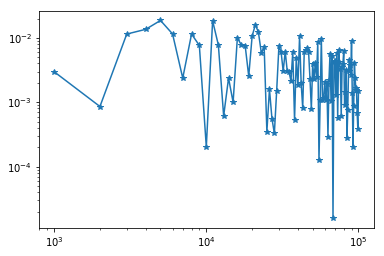

In [5]:
plt.loglog(n,est, '-*')

### 2

#### 2.1
 
Seja X uma v.a. com distribuição exponencial com parâmetro $\lambda > 0$, $F_x(x) = P[X \leq x] = 1 - e^{-\lambda x}$

Para achar a inversa:

$1 - e^{-\lambda x} = u \Longrightarrow e^{-\lambda x} = 1 - u  \Longrightarrow  -\lambda x = ln(1-u) \Longrightarrow x = \frac{-ln(1-u)}{\lambda} $

$F_x(u)^{-1} = \frac{-ln(1-u)}{\lambda} $, sendo $u \sim unif(0,1)$

#### 2.2

$X$ tem distribuição de Pareto, logo $F_x(x) = P[X \leq x] =$ $$\int\limits_{x_0}^x \frac{\alpha x_0^{\alpha}}{x^{\alpha+1}} dx = 1 - \frac{x_0^\alpha}{x^\alpha}$$	

$\frac{x_0^\alpha}{x^\alpha} = 1 - u \Longrightarrow  \frac{x_0}{x} = \sqrt[\leftroot{-2}\uproot{2}\alpha]{(1-u)} \Longrightarrow x = \frac{x_0}{\sqrt[\leftroot{-2}\uproot{2}\alpha]{(1-u)}}$, onde $u \sim unif(0,1)$


### 3

#### 3.1

Seja $X_n$ o o espaço de dominios de tamanho n da ufrj, $|X_n|$ é sua cardinalidade

Seja $D_k$ a variável aleatória que conta quantos palavras dominios de tamanho k ou menor existem,

$p_{D_k} = \frac{\sum_{i=1}^{k}|X_i|}{\sum_{j=1}^{k}{26^i}}$

Seja D a variável aleatória da quantidade de domínios existentes

$E[D] = \sum_{i=1} p_{D_i} i$

#### 3.2

$Var[D] = \sum_{i=1} p_{D_i} i^2 - E^2[D]$

#### 3.3

In [6]:
import httplib2
h = httplib2.Http()

In [7]:
def monte_carlo_ufrj(k, N):
    lK = np.arange(2,k+1,1)
    n = 0
    for _ in range(N):
        sizeW = rd.choice(lK)
        word = ''.join(rd.choice(string.ascii_lowercase) for _ in range(sizeW))
        try:
            h.request('http://www.%s.ufrj.br'%(word))
            n+=1
        except:
            pass        
    return n

In [ ]:
start = int(100)
step = int(1000)
stop = int(10000)+step
nsteps = np.arange(start, stop, step)
wn = []
for N in nsteps:
    wn.append(monte_carlo_ufrj(4, N))

In [ ]:
plt.plot(nsteps,wn)

Podemos ver que:

### 4

Ideia: usar a exponencial com rejection sampling

Podemos gerar $Z$ por simetria, onde $Z = S|Z|$ onde $S$ é o sinal de $Z$ com prob $\frac{1}{2}$, se $U \leq 0.5$ então $Z = -|Z|$ se $U > 0.5$ então $Z = |Z|$ , logo $|Z|$ tem densidade $f(x) = 2f_z(x), x\geq 0$ 

$g(x) = \lambda e^{-\lambda x}$ e $f(x) = \frac{2e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}$, queremos algo com $f(x) \leq cg(x)$, queremos max $\frac{f(x)}{g(x)} = \frac{\frac{2e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}}{\lambda e^{-\lambda x}} = \frac{e^{\lambda x -\frac{x^2}{2}}}{\lambda \sqrt{2\pi}}$

derivando : $\frac{e^{\lambda x -\frac{x^2}{2}}}{\lambda \sqrt{2 \pi}}(\lambda - x)$, logo o máximo acontece quando $x = \lambda$

Usando $\lambda = 1, x = 1$, logo para $x=1 \Longrightarrow \frac{f(x)}{g(x)} = \sqrt{\frac{2e}{ \pi}}$

$\frac{f(x)}{cg(x)} = e^{\frac{-{(x-1)}^2}{2}} $

1. geramos a distribuição exponencial a partir de a função inversa e a Uniforme, ou seja $Y = -ln(U), U \sim unif(0,1)$
2. Geramos U novamente
3. Se $U \leq e^{\frac{-{(Y-1)^2}}{2}}$, então $|Z|=Y$, caso contrário volta-se para 1
4. Gera-se $U$, se $U \leq 0.5$ então $Z = -|Z|$, caso contrário $Z = |Z|$

In [ ]:
def inverse_exp(l=1):
    return -log(rd.random())/l

In [ ]:
def normal():
    u = rd.random()
    y = inverse_exp()
    while u > (exp(-(y-1)**2)/2):
        u = rd.random()
        y = inverse_exp()
    u = rd.random()
    if u > 0.5:
        return y
    else:
        return -y

### 5

O estimador usado em sala de aula foi o $\frac{i}{K_2}$ onde $K_2 = \sum_{i=1}{n}i$, calculando computacionalemtne conseguimos $1,035*10^{13}$, intuitivamente se usarmos outro porporcional como $ilog(i)$ esperamos que seja ligeiramente melhor e calculando computacionalmente foi, deu $1,028*10^{13}$


In [ ]:
N = 1000
# sala de aula 
S = 0
K2 = 0

#nossa hipotese
S3 = 0
K4 = 0
for i in range(1,N+1):
    S += i*(log(i)**2)
    K2+=i
    
    K4 += i*log(i)
    S3 += i*log(i)

print((K4*S3)/(K2*S))

In [ ]:
def monte_carlo_gn(N, nsamples):
    numbers = np.arange(1,N+1, 1)
    S = sum(numbers)
    prob = numbers/S
    Gn = 0
    for i in range(nsamples):
        n = np.random.choice(numbers, p=prob)
        Gn += log(n)
    return Gn*S/nsamples

In [ ]:
N=10
#valor empírico
Gn = 0
for i in range(1,N+1):
    Gn+= i*log(i)
(monte_carlo_gn(N,1000)-Gn)/Gn

In [ ]:
start = 100
step = 1000
stop = 100000

N=1000
#valor empírico
Gn = 0
for i in range(1,N+1):
    Gn+= i*log(i)
ws = np.arange(start, stop, step)
err = []
for i in ws: 
    S2 = monte_carlo_gn(N, i)
    err.append(abs(S2-Gn)/Gn)

In [ ]:
log(err[-1]), log(err[-2]),log(err[-3]), log(err[-4])

In [ ]:
plt.xlabel('numero de iterações')
plt.ylabel('erro relativo')
plt.title('Aproximação Gn via Monte Carlo')
plt.loglog(ws,err)

### 6

#### 6.1

$$\int\limits_{a}^b x^{\alpha}dx = \frac{x^{\alpha+1}}{\alpha+1} |_a^b = \frac{(b^{\alpha+1} - a^{\alpha+1})}{\alpha+1}$$

#### 6.2

Seja $X \sim unif[a,b]$ e $Y \sim unif[a^\alpha,b^\alpha]$

Seja I cuja função de densidade é $g(X,Y) = 1$ se $f(X) \leq Y$, 0 c.c.

$E[I] = g(\alpha, a,b) = \frac{(b^{\alpha+1} - a^{\alpha+1})}{\alpha+1}$

In [ ]:
def integration(ap, a, b, N):
    sx = b-a
    sy = b**ap - a**ap
    ay = a**ap
    Mn = 0
    for i in range(N):
        x = rd.random()*sx+a
        y = rd.random()*sy+ay
        if x**ap <= y:
            Mn+=1
    return (Mn/N)*sx*sy/ap

In [ ]:
def g(ap,a,b):
    return (b**(ap+1)-a**(ap+1))/(ap+1)

In [ ]:
alpha = [1,2,3]
bs = [1,2,3]
a = 0
Nsteps = np.arange(10,int(10e5),int(10e3))
color = ['b','r','g']
for ap in alpha:
    plt.figure()
    plt.title('alpha=%s'%(ap))
    plt.xlabel('número de amostras')
    plt.ylabel('erro relativo')
    for b,c in zip(bs, color):
        error = []
        for N in Nsteps:
            gm = integration(ap, a, b, N)
            ga = g(ap,a,b)
            err = abs(gm - ga)/ga
            error.append(err)        
        plt.loglog(Nsteps,error,'-*',color=c)
    plt.legend(bs)


Vemos que os erros diminuem conforme o número de amostras feitas conforme esperado e os erros ficam instáveis para um número de amostras muito grande, provavelmente, devido a arredondamentos numéricos feito pelo computador e em relação aos parâmetros, não há diferenças significativas se variarmos os parâmetros, como era o esperado.

### 7

Se criarmos um vetor de tamanho N, onde cada entrada dele é um um número de [1..N] e percorremos esse vetor de trás pra frente, onde dado que estamos na última posição escolhemos um número de 1 a N com igual probabilidade para trocar de lugar o último número, na segunda iteração faremos a mesma coisa com o penúltimo número, só que dessa vez escolhemos só as posições de [1..N-1] para trocarmos de posição e faremos isso N vezes, esse é o algoritmo Knuff Shufle para gerar permutações de N elementos de maneira uniforme. Se modificarmos esse algoritmo para parar na k-ésima iteração e recolher os últimos k elementos do vetor, teremos um subconjunto de tamanho k dentre n objetos, com igual probabilidade de acontecer.

### 8

#### 8.1 

ideia 1:Sejam $X_i$ v.a. iid a $X$, se gerarmos n amostras e aplicarmos uma função indicadora $I$ tal que $I(x) = 1$ se$ X_i \geq x$ e $0$ c.c, e fizermos a média amostral: $\frac{\sum_{i=1}^nI(X_i)}{n}$, conseguiremos uma boa aproximação de $P[X \geq x]$

#### 8.2

ideia 1:
    $Var[I(X)] = pq$, onde $p=P[I(x)=1]=P[X \geq x]$ e $q = 1-p$
ideia 2:

#### 8.3

Se fizermos importance sampling com $h(x) = (S-x)/S$ ond $S = D_0+\int_D ds$, onde $D_0$ é o primeiro ponto de D, 

teremos $E[X^2] = \frac{1}{n}\sum_{i=1}^n \frac{I^2(X_i)}{h(X_i)} = \frac{1}{n}S\sum_{i=1}^n \frac{I^2(X_i)}{S-X_i}  = \frac{1}{n}S\sum_{i=1}^n \frac{I(X_i)}{S - X_i}$

$Var = \frac{1}{n}S\sum_{i=1}^n \frac{I(X_i)}{S - X_i} - p^2$

In [ ]:
def monte_carlo_simples(x, nsamples):
    normal = np.random.normal(0,1, nsamples)
    p = [1 if n >= x 0 else for n in normal]
    return sum(p)/nsamples

In [ ]:
def monte_carlo_complex(x, nsamples):
    